# `INDEED JOB POSTING TEXT: NLP & WORD CLOUD ` 

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# Purpose & Outcome:

+ Gain more experience with NLP and have fun with a new visualization technique

+ Clean the text using NLTK

+ Create a word cloud and have the words inlaid within an image I provide

In [2]:
import pickle                            # open our file
import pandas as pd
import os
import re

# plotting image with word cloud
import PIL                               # for our images
import numpy as np                       # convert image to np arrays
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS # generate word cloud
import matplotlib.pyplot as plt          # plotting

# nlp
import nltk                              # text processing
from nltk import word_tokenize           # split sentence into list of words
from nltk.corpus import stopwords        # remove: and,it,i,etc
import string                            # remove punctuation
from collections import defaultdict      # dictionary with values as lists
from nltk.stem import WordNetLemmatizer  # remove word endings etc

In [135]:

filename='Indeed_scrape_Oct2020.txt'
indeed_file_ =open(filename,'rb')
indeed_jobs = pickle.load(indeed_file_)
indeed_jobs.head()



buzz_words=['Python','SQL','AWS', 'Machine learning','Deep learning','Text mining',
'NLP','SAS','Tableau','Sagemaker','Tensorflow','Spark', 'numpy', 'MongDB','PSQL',
"Postgres", 'Pandas', 'RESTFUL','NLP','Statistics','Algorithms','Visualization',
'GCP','Google Cloud','Naive Bayes','Random Forest','Bachelors degree','Masters degree'
'Java','Pyspark','Postgres','MySQL','Github','Docker','Machine Learning','C+',
'C++','Pytorch','Jupyter Notebook','R Studio','R-Studio','Forecasting','Hive',
'PhD','GCP','Numpy','NoSQL','Neo4j','Neural Network','Clustering','Linear Algebra',
'Google Colab','Data Mining','Regression','Time Series','ETL','Data Wrangling',
'Web Scraping','Feature Extraction','Featuring Engineering','Scipy','ML','DL']
buzz_words_list=[x.lower() for x in buzz_words]  # convert list to lowercase to parse

yo=[]
for i in range(len(indeed_jobs.Qual_Text)):
    a=buzz_words_list
    dd=[x for x in a if x in indeed_jobs.Qual_Text[i].lower()]
    yo.append(dd)
indeed_jobs['skill_matches']=yo
indeed_jobs

filename='Indeed_scrape_Oct2020.txt'
file=open(filename,'wb')
pickle.dump(indeed_jobs,file)

# `Get a baseline of how many words there are for each entry:`

In [4]:
orig_word_cnts=[]
for i in indeed_jobs['Qual_Text']:
    orig_word_cnts.append(len(i))

indeed_text_cnts=pd.concat([indeed_jobs['Qual_Text'],
pd.DataFrame(orig_word_cnts,columns=['Qual_Text_wrdCnt'])],axis=1)

indeed_text_cnts.head()

,Qual_Text,Qual_Text_wrdCnt
0,The CompanyThe world is facing a medical crisi...,3938
1,Data ScientistLaxmi Therapeutic Devices – Gole...,2798
2,"Our Mission\nWe’re here to create a safer, hap...",3423
3,"Data EngineerSunnyvale, CAAmick Brown is seeki...",2505
4,About Triplebyte\n\nTriplebyte is transforming...,2772


# `Find webpage links from text if exists:`

In [119]:
#  re_pattern=r'\b(?:http.*).+?(?=\")\b'

find_web_links=[]
for i in indeed_jobs['Qual_Text']:
#     print(type(i))
        re_pattern=r'\b(?:http).+\b'
        if re.findall(re_pattern,i):
            find_web_links.append(re.findall(re_pattern,i))
        else:
            find_web_links.append([])
len(find_web_links)
find_web_links[:13]

[[],
 [],
 ['https://sfgov.org/olse/sites/default/files/FCO%20poster2020.pdf'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['https://www.amazon.jobs/en/disability/us'],
 []]

# `Now we need to remove these from our text:`

In [127]:
text_wo_http=[]
for i in indeed_jobs['Qual_Text']:
    re_pattern=r'\b(?:http).+\b'
    if re.findall(re_pattern,i):
        text_wo_http.append(re.sub(re_pattern,' ',i))
    else:
        text_wo_http.append(i)
len(text_wo_http )


['The CompanyThe world is facing a medical crisis, bacteria are increasingly evolving resistance to even our strongest antibiotics. The problem is already very real and immediate; for example, bloodstream infection leading to sepsis is now responsible for more than half of all deaths in hospitals and is the most expensive condition treated in hospitals. Sepsis mortality rate increases >6% every hour without effective antibiotic treatment. Yet, despite the life and death urgency, and healthcare cost impacts, current methodologies require 3 days to determine the correct antibiotic.Specific Diagnostics has developed a breakthrough solution to rapidly determine the effective antibiotic treatment for bloodstream and other acute infections. Used for bloodstream infection Specific’s solution provides results 2 days sooner than existing methods, saving patients suffering from drug-resistant infection.We have been funded by nearly $30 M in non-dilutive government sponsored research support and 

In [130]:
text_wo_http_recheck=[]
for i in text_wo_http:
#     print(type(i))
        re_pattern=r'\b(?:http).+\b'
        if re.findall(re_pattern,i):
            text_wo_http_recheck.append(re.findall(re_pattern,i))     
len(text_wo_http_recheck)

0

# Checks out off to the next step:

`----------------------------------------`

# `Remove punctuation and digits:`

this is what `string.punctuation` removes: `'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'`

+ remember that each row will correspond to an entry/job posting and all of its text, which now is stortened and converted to lowercase


In [8]:
# import string
wrd_lst_tokens=[]
for ikl in indeed_jobs['Qual_Text']:
    punct=word_tokenize(''.join(j for j in ikl.lower() if j not in string.punctuation if not j.isdigit()))
    wrd_lst_tokens.append([punct])

pd.DataFrame(wrd_lst_tokens,columns=['Qualification_text_removed_punct_digits']).head()

# feel free to use a dictionary with this if you want.

,Qualification_text_removed_punct_digits
0,"[the, companythe, world, is, facing, a, medica..."
1,"[data, scientistlaxmi, therapeutic, devices, –..."
2,"[our, mission, we, ’, re, here, to, create, a,..."
3,"[data, engineersunnyvale, caamick, brown, is, ..."
4,"[about, triplebyte, triplebyte, is, transformi..."


# `Remove Stopwords, single characters, useless words as well`

In [10]:
clean_stp_wrds=[]
stopwrds = stopwords.words('english')
for i in wrd_lst_tokens:
# removing single letters, [:-2] will remove last 2 str from each list bc useless
    line = [j for j in i[0] if len(j) > 1]
#     print(line)
# remove our stopwords like: ('i','it','etc')
    clean_stp_wrds.append([[ii for ii in line if ii not in stopwrds]])


# print('Example of amount of data after: ',len(pd.DataFrame(d)[0][1])/len(news_['content'][0]))
pd.DataFrame(clean_stp_wrds).head()


,0
0,"[companythe, world, facing, medical, crisis, b..."
1,"[data, scientistlaxmi, therapeutic, devices, g..."
2,"[mission, create, safer, happier, mindful, fut..."
3,"[data, engineersunnyvale, caamick, brown, seek..."
4,"[triplebyte, triplebyte, transforming, way, so..."


# Check back to see how many of our words are left as comparison

In [11]:
second_wrd_cnt=[]
for i in clean_stp_wrds:
    for j in i:
        second_wrd_cnt.append(len(j))

indeed_text_cnts['cleaned_wrd_cnt']=second_wrd_cnt
indeed_text_cnts.head()

,Qual_Text,Qual_Text_wrdCnt,cleaned_wrd_cnt
0,The CompanyThe world is facing a medical crisi...,3938,317
1,Data ScientistLaxmi Therapeutic Devices – Gole...,2798,241
2,"Our Mission\nWe’re here to create a safer, hap...",3423,330
3,"Data EngineerSunnyvale, CAAmick Brown is seeki...",2505,224
4,About Triplebyte\n\nTriplebyte is transforming...,2772,252


# `Lemmatization: looking for root or bases of words`


In [12]:
# from collections import defaultdict
# from nltk.stem import WordNetLemmatizer  # remove word endings etc

lemmatizer = WordNetLemmatizer()
lemma_lst=[]
for i in range(len(d)):
    for j in d[i][0]: # going inside each list and doing each word
#         print(j)
        lemma_lst.append([i,lemmatizer.lemmatize(j)]) # i keeps the position 

dg=defaultdict(list)

for i in lemma_lst:
    dg[i[0]].append(i[1]) # key=position,value:list of lists of strings

In [13]:
third=[]
for i in dg.values():
    third.append(len(i))


In [14]:
indeed_text_cnts['lemma_len']=third
indeed_text_cnts['lemma_wrds']=dg.values()
indeed_text_cnts.head()

,Qual_Text,Qual_Text_wrdCnt,cleaned_wrd_cnt,lemma_len,lemma_wrds
0,The CompanyThe world is facing a medical crisi...,3938,317,317,"[companythe, world, facing, medical, crisis, b..."
1,Data ScientistLaxmi Therapeutic Devices – Gole...,2798,241,241,"[data, scientistlaxmi, therapeutic, device, go..."
2,"Our Mission\nWe’re here to create a safer, hap...",3423,330,330,"[mission, create, safer, happier, mindful, fut..."
3,"Data EngineerSunnyvale, CAAmick Brown is seeki...",2505,224,224,"[data, engineersunnyvale, caamick, brown, seek..."
4,About Triplebyte\n\nTriplebyte is transforming...,2772,252,252,"[triplebyte, triplebyte, transforming, way, so..."


# `Lets Check something interesting:`

I know from running this earlier that `science,scientist,scientists` seems to not be taken care of with this lemmatizer. 

In [100]:
import re
check_science_wrds=[]
for i in dg.values():
    for j in i:
        if re.findall(r'\b(?:scien.*).+',j):
            check_science_wrds.append(re.findall(r'\b(?:scien.*).+',j))
pd.DataFrame(check_science_wrds).head(12)


,0
0,science
1,science
2,scientist
3,science
4,science
5,science
6,scientistlaxmi
7,science
8,science
9,science


# Well this is an interesting delema:

+ Either sort this out with a new 

# `Create Cloud Object:`

In [390]:
from PIL import Image
combine_all_wrd=[]
for i in indeed_text_cnts['lemma_wrds']:
#     print(i)
    b=" ".join(review for review in i)
    for j in i:
        combine_all_wrd.append(','.join(j))
len(combine_all_wrd)
vv=[]
# " ".join(review for review in indeed_text_cnts.lemma_wrds)
b

'ames numeric solution llc premier user experience web development service company located ames iowa year experience web database development team member worked successfully startup largescale enterprise produce worldclass interactive web application frontend backend current project include project punch card project eyeglass project briefcase project texamposition type full time experienced full time entry leveljob description data scientist evaluate improve product collaborate multidisciplinary team engineer analyst wide range problem position bring scientific rigor statistical method challenge product creation development improvement appreciation behavior end userjob responsibilitiesformulates lead guided multifaceted analytic study large volume datainterprets analyzes data using exploratory mathematic statistical technique based scientific methodcoordinates research analytic activity utilizing various data point unstructured structured employ programming clean massage organize data

# `Remove further words:`

+ First, get word frequencies to see if there are useless words to remove

+ Second, use a list of new stopwords to remove

In [391]:
f={}
for i in indeed_text_cnts['lemma_wrds']:
    for j in i:
#     print(i)
        if j in f:
            f[j]+=1
        else:
            f[j]=1
wrd_freq={k: v for k, v in sorted(f.items(), key=lambda item: item[1])}


In [392]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

# ax.bar(wrd_freq.keys(),wrd_freq.values())
# plt.show()
# wrd_freq['']

In [393]:
more_wrd_to_remove=['year','experience','user','employee','type','llc','member','youll',
'various','range','position','end','service','leveljob','wide','card']

# `Convert Image using Numpy:`

In [394]:
# mask: 
# img_mask= np.array(Image.open(os.path.join(os.getcwd(),'cartoon_computer.png')))
# img_mask=np.array(Image.open('cartoon_computer.png'))
# img_mask=np.array(Image.open('cloud_img.png'))
img_mask=np.array(Image.open('Slide1.png'))

In [395]:
wc=WordCloud(background_color='grey',max_words=400,max_font_size=80,random_state=1,
    mask=img_mask,contour_color='red',min_font_size=8,normalize_plurals=True)
# for i in combine_all_wrd:
# wc.generate(combine_all_wrd)
# q

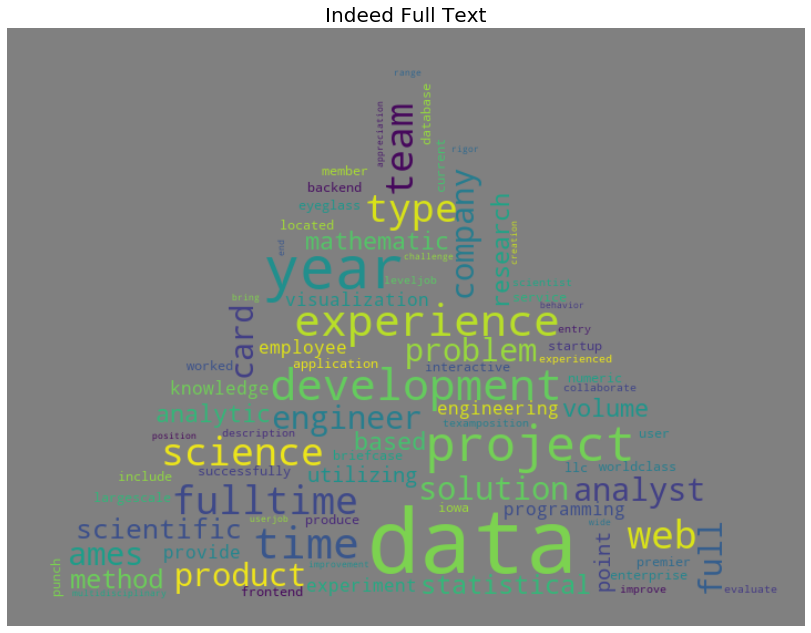

In [396]:

wc.generate(b)

# colors=wc.recolor(color_func=ImageColorGenerator(img_mask))
plt.figure(figsize=(22,11))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Full Text",fontsize=20)
plt.axis("off")
plt.show()

# `Skills taken from column matching our subset list:`

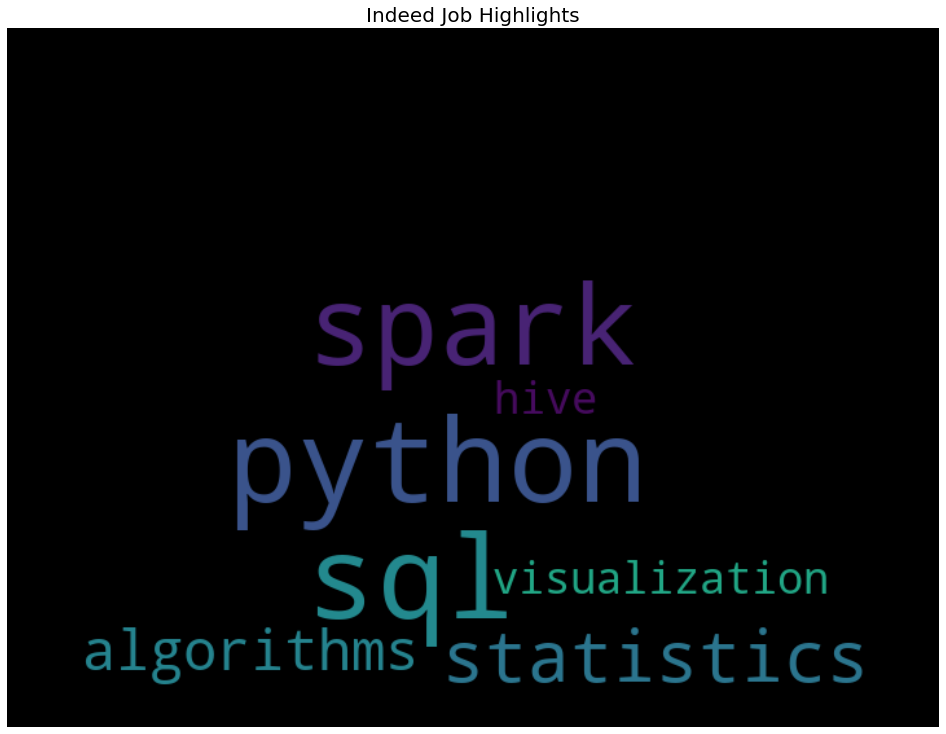

In [397]:
skills=[]
for i in indeed_jobs['skill_matches']:
     b_=" ".join(review for review in i)
wc=WordCloud(background_color='black',max_words=30,max_font_size=90,random_state=1,
    mask=img_mask)
wc.generate(b_)
plt.figure(figsize=(22,10))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Job Highlights",fontsize=20)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [332]:
# indeed_text_cnts['lemma_wrds']


# Citations & Help:

# ◔̯◔

https://www.datacamp.com/community/tutorials/wordcloud-python

https://www.youtube.com/watch?v=k-gin1qfzi0

https://www.youtube.com/watch?v=eHxWshJpoRk&t=1048s

<!-- https://pixabay.com/vectors/cartoon-computer-tooned-in-2026805/ -->